### Using `SJOIN` (spatial join) to aggregate individual geopoints to an area

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
complaint_df = pd.read_csv('../data/NYPD_Complaint_Data_updated.csv')

In [4]:
complaint_df

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,251049117,6.0,MANHATTAN,09/10/2022,20:58:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,25-44,WHITE,M,983915,207950,40.737452,-74.001208,"(40.737452, -74.001208)",POINT (-74.001208 40.737452)
1,251080368,28.0,MANHATTAN,09/14/2022,18:04:00,09/14/2022,18:04:00,COMPLETED,(null),4069.0,...,NaN,UNKNOWN,UNKNOWN,E,997345,232114,40.803768,-73.952699,"(40.803768, -73.952699)",POINT (-73.952699 40.803768)
2,250848395,34.0,MANHATTAN,09/10/2022,00:45:00,09/10/2022,00:52:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,1005067,253188,40.861593,-73.924742,"(40.86159271, -73.92474206)",POINT (-73.92474206 40.86159271)
3,250884720,7.0,MANHATTAN,09/10/2022,13:25:00,09/10/2022,13:29:00,COMPLETED,(null),NaN,...,NaN,65+,WHITE HISPANIC,M,989137,201443,40.719591,-73.982367,"(40.719591, -73.982367)",POINT (-73.982367 40.719591)
4,251231047,6.0,MANHATTAN,09/17/2022,02:38:00,09/17/2022,03:01:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,985175,206952,40.734713,-73.996662,"(40.734713, -73.996662)",POINT (-73.996662 40.734713)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36548,260537905,6.0,MANHATTAN,12/27/2022,10:36:00,12/27/2022,10:38:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,984922,207549,40.736352,-73.997574,"(40.736352, -73.997574)",POINT (-73.997574 40.736352)
36549,261105520,24.0,MANHATTAN,12/29/2022,18:50:00,12/29/2022,19:07:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,994398,229316,40.796090,-73.963349,"(40.79608961, -73.96334889)",POINT (-73.96334889 40.79608961)
36550,260579307,13.0,MANHATTAN,12/27/2022,23:30:00,12/27/2022,23:45:00,COMPLETED,(null),NaN,...,NaN,45-64,ASIAN / PACIFIC ISLANDER,M,986345,208012,40.737624,-73.992440,"(40.737624, -73.99244)",POINT (-73.99244 40.737624)
36551,260512603,10.0,MANHATTAN,12/26/2022,13:00:00,12/26/2022,13:05:00,COMPLETED,(null),NaN,...,NaN,25-44,ASIAN / PACIFIC ISLANDER,F,984227,213725,40.753303,-74.000079,"(40.753303, -74.000079)",POINT (-74.000079 40.753303)


In [3]:
complaint_df['ADDR_PCT_CD'].value_counts()

14.0     4041
18.0     2659
19.0     2537
1.0      2520
25.0     1960
13.0     1906
34.0     1875
6.0      1781
23.0     1734
32.0     1721
9.0      1668
28.0     1559
7.0      1475
24.0     1375
5.0      1345
33.0     1228
10.0     1218
30.0     1127
20.0     1001
17.0      958
26.0      755
22.0       63
114.0      32
105.0       3
104.0       2
120.0       1
108.0       1
107.0       1
110.0       1
84.0        1
123.0       1
Name: ADDR_PCT_CD, dtype: int64

In [5]:
complaint_gdf = gpd.GeoDataFrame(complaint_df,
                                 geometry=gpd.GeoSeries.from_wkt(complaint_df['New Georeferenced Column']))

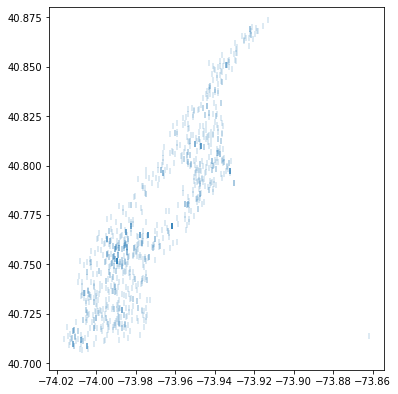

In [6]:
complaint_gdf.sample(1000).plot(marker=2, alpha=0.2, figsize=(6,10))
plt.show()

In [7]:
precinct_gdf = gpd.read_file('../data/manhattan_police_precincts.geojson')

In [10]:
gpd.sjoin(precinct_gdf,
          complaint_gdf)
        

/tmp/ipykernel_1241396/3294850269.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  gpd.sjoin(precinct_gdf,


,precinct,shape_area,shape_leng,geometry,index_right,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,1,47182160.4145,79979.409545,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",21671,254348856,1.0,MANHATTAN,11/18/2022,09:30:00,...,NaN,25-44,WHITE,M,980210,194782,40.701310,-74.014570,"(40.70131, -74.01457)",POINT (-74.01457 40.70131)
0,1,47182160.4145,79979.409545,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",2941,251391575,1.0,MANHATTAN,09/21/2022,09:00:00,...,NaN,25-44,WHITE HISPANIC,M,980210,194782,40.701310,-74.014570,"(40.70131, -74.01457)",POINT (-74.01457 40.70131)
0,1,47182160.4145,79979.409545,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",24233,254589408,1.0,MANHATTAN,11/20/2022,00:10:00,...,NaN,25-44,ASIAN / PACIFIC ISLANDER,M,980770,194854,40.701505,-74.012551,"(40.70150526, -74.01255073)",POINT (-74.01255073 40.70150526)
0,1,47182160.4145,79979.409545,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",15847,253288297,1.0,MANHATTAN,10/29/2022,01:00:00,...,2.0,25-44,BLACK,M,980770,194854,40.701505,-74.012551,"(40.70150526, -74.01255073)",POINT (-74.01255073 40.70150526)
0,1,47182160.4145,79979.409545,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",27799,254789109,1.0,MANHATTAN,11/29/2022,03:00:00,...,NaN,25-44,WHITE,L,980770,194854,40.701505,-74.012551,"(40.70150526, -74.01255073)",POINT (-74.01255073 40.70150526)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,34,52113460.9152,45567.0203008,"MULTIPOLYGON (((-73.92929 40.84585, -73.92933 ...",36348,260579309,34.0,MANHATTAN,12/28/2022,02:32:00,...,NaN,UNKNOWN,UNKNOWN,D,1006979,257258,40.872759,-73.917816,"(40.872759, -73.917816)",POINT (-73.917816 40.872759)
20,34,52113460.9152,45567.0203008,"MULTIPOLYGON (((-73.92929 40.84585, -73.92933 ...",1986,251609419,34.0,MANHATTAN,09/23/2022,22:00:00,...,NaN,45-64,UNKNOWN,M,1006979,257258,40.872759,-73.917816,"(40.872759, -73.917816)",POINT (-73.917816 40.872759)
20,34,52113460.9152,45567.0203008,"MULTIPOLYGON (((-73.92929 40.84585, -73.92933 ...",22530,254352054,34.0,MANHATTAN,11/12/2022,17:30:00,...,NaN,45-64,WHITE,F,1006801,257354,40.873023,-73.918459,"(40.87302285, -73.91845926)",POINT (-73.91845926 40.87302285)
20,34,52113460.9152,45567.0203008,"MULTIPOLYGON (((-73.92929 40.84585, -73.92933 ...",27172,255210575,34.0,MANHATTAN,12/05/2022,18:33:00,...,NaN,45-64,WHITE,M,1006801,257354,40.873023,-73.918459,"(40.87302285, -73.91845926)",POINT (-73.91845926 40.87302285)


In [9]:
gpd.sjoin(manhattan_po

Signature:
gpd.sjoin(
    left_df,
    right_df,
    how='inner',
    op='intersects',
    lsuffix='left',
    rsuffix='right',
)
Docstring:
Spatial join of two GeoDataFrames.

See the User Guide page :doc:`../../user_guide/mergingdata` for details.


Parameters
----------
left_df, right_df : GeoDataFrames
how : string, default 'inner'
    The type of join:

    * 'left': use keys from left_df; retain only left_df geometry column
    * 'right': use keys from right_df; retain only right_df geometry column
    * 'inner': use intersection of keys from both dfs; retain only
      left_df geometry column
op : string, default 'intersects'
    Binary predicate. Valid values are determined by the spatial index used.
    You can check the valid values in left_df or right_df as
    ``left_df.sindex.valid_query_predicates`` or
    ``right_df.sindex.valid_query_predicates``
lsuffix : string, default 'left'
    Suffix to apply to overlapping column names (left GeoDataFrame).
rsuffix : string, defau